In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math
from pandas_datareader import data
import seaborn as sns

In [43]:
df1 = pd.read_csv("HDB Final V2.csv", index_col=[0])
df1

,Unnamed: 0.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,Dist from Nearest Park,Nearest Park,Dist from Polyclinic,Nearest Polyclinic,Dist from Primary School,Nearest Primary School,Dist from Shopping Mall,Nearest Shopping Mall,Dist from Nearest Supermarket,Nearest Supermarket
0,0,1,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,...,0.955198,Tai Hwan Terrace Playground,1.365108,Ang Mo Kio Polyclinic,0.206875,Townsville Primary School,1.023055,AMK Hub,0.385974,G8 MART PTE. LTD.
1,1,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,...,0.256737,Mayflower Crescent Playground,1.013136,Ang Mo Kio Polyclinic,0.245778,Ang Mo Kio Primary School,0.870217,Broadway Plaza,0.395388,COLD STORAGE SINGAPORE (1983) PTE LTD
2,2,1,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,...,0.133744,Serenade Walk Playground,1.611807,Ang Mo Kio Polyclinic,0.498079,Mayflower Primary School,1.535061,Broadway Plaza,0.884793,COLD STORAGE SINGAPORE (1983) PTE LTD
3,3,1,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,...,0.886572,Ang Mo Kio Town Garden East,1.284217,Ang Mo Kio Polyclinic,0.713841,Teck Ghee Primary School,0.923157,myVillage At Serangoon Garden,0.468595,G8 MART PTE. LTD.
4,4,1,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,...,0.189445,Serenade Walk Playground,1.639887,Ang Mo Kio Polyclinic,0.555594,Mayflower Primary School,1.567164,Broadway Plaza,0.929657,COLD STORAGE SINGAPORE (1983) PTE LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134511,134511,8,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,150.0,Maisonette,1988,...,0.044419,Yishun Park,1.025531,Yishun Polyclinic,0.226732,Huamin Primary School,0.896799,Wisteria Mall,0.202889,NTUC FAIRPRICE CO-OPERATIVE LTD
134512,134512,8,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,146.0,Maisonette,1988,...,0.044419,Yishun Park,1.025531,Yishun Polyclinic,0.226732,Huamin Primary School,0.896799,Wisteria Mall,0.202889,NTUC FAIRPRICE CO-OPERATIVE LTD
134513,134513,8,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,146.0,Maisonette,1988,...,0.044419,Yishun Park,1.025531,Yishun Polyclinic,0.226732,Huamin Primary School,0.896799,Wisteria Mall,0.202889,NTUC FAIRPRICE CO-OPERATIVE LTD
134514,134514,8,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,...,0.778111,Yishun Pond Park,0.287191,Yishun Polyclinic,0.350708,Northland Primary School,0.539016,Wisteria Mall,0.525973,KAI SOON SUPERMARKET PTE. LTD.


In [14]:
df1.columns

Index(['Unnamed: 0.1', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'Address', 'lat', 'lng', 'date',
       'year', 'Dist from Nearest Expressway', 'Nearest Expressway',
       'Dist from Nearest Hawker Centre', 'Nearest Hawker Centre',
       'Dist from Nearest Public Hospital', 'Nearest Public Hospital',
       'Dist from Nearest MRT', 'Nearest MRT', 'Dist from Nearest Park',
       'Nearest Park', 'Dist from Polyclinic', 'Nearest Polyclinic',
       'Dist from Primary School', 'Nearest Primary School',
       'Dist from Shopping Mall', 'Nearest Shopping Mall',
       'Dist from Nearest Supermarket', 'Nearest Supermarket'],
      dtype='object')

In [44]:
df1 = df1[(df1["town"] == "YISHUN") & (df1["flat_type"] == "4 ROOM") & (df1["storey_range"] == "10 TO 12") & (df1["year"] == 2021)]

In [45]:
df1.drop(columns=["month", 'Unnamed: 0.1'], inplace=True)
df1

C:\Users\yuhao\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,...,Dist from Nearest Park,Nearest Park,Dist from Polyclinic,Nearest Polyclinic,Dist from Primary School,Nearest Primary School,Dist from Shopping Mall,Nearest Shopping Mall,Dist from Nearest Supermarket,Nearest Supermarket
89988,YISHUN,4 ROOM,348A,YISHUN AVE 11,10 TO 12,92.0,DBSS,2013,91 years 09 months,580000.0,...,0.182607,Yishun Pond Park,0.748616,Yishun Polyclinic,0.322649,Huamin Primary School,0.662010,Northpoint City,0.327172,TAN KWEE ENG
89990,YISHUN,4 ROOM,426B,YISHUN AVE 11,10 TO 12,92.0,Model A,2015,93 years 03 months,448000.0,...,0.328695,Yishun Park,1.182858,Yishun Polyclinic,0.567388,Huamin Primary School,0.776927,Wisteria Mall,0.209083,NTUC FAIRPRICE CO-OPERATIVE LTD
89991,YISHUN,4 ROOM,347A,YISHUN AVE 11,10 TO 12,92.0,DBSS,2013,91 years 09 months,590000.0,...,0.285424,Yishun Pond Park,0.882843,Yishun Polyclinic,0.217781,Huamin Primary School,0.754986,Northpoint City,0.244240,TAN KWEE ENG
89993,YISHUN,4 ROOM,348D,YISHUN AVE 11,10 TO 12,92.0,DBSS,2013,91 years 08 months,580000.0,...,0.302875,Yishun Park,0.856256,Yishun Polyclinic,0.178640,Huamin Primary School,0.815176,Northpoint City,0.355041,TAN KWEE ENG
89996,YISHUN,4 ROOM,283,YISHUN AVE 6,10 TO 12,104.0,Model A,1985,63 years 10 months,373000.0,...,0.435958,Yishun Neighbourhood Park,1.793903,Yishun Polyclinic,0.085385,Chongfu School,1.028015,Canberra Plaza,0.354831,COLD STORAGE SINGAPORE (1983) PTE LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116618,YISHUN,4 ROOM,504C,YISHUN ST 51,10 TO 12,93.0,Model A,2016,93 years 03 months,500500.0,...,0.739098,Yishun Park,0.984983,Yishun Polyclinic,0.419836,Northland Primary School,0.240525,Wisteria Mall,0.197052,SHENG SIONG SUPERMARKET PTE LTD
116620,YISHUN,4 ROOM,512B,YISHUN ST 51,10 TO 12,93.0,Model A,2017,94 years 08 months,510000.0,...,1.172595,Yishun Park,1.188365,Yishun Polyclinic,0.389668,Naval Base Primary School,0.400530,Wisteria Mall,0.267699,U STARS PTE. LTD.
116621,YISHUN,4 ROOM,504C,YISHUN ST 51,10 TO 12,93.0,Model A,2016,93 years 03 months,490000.0,...,0.739098,Yishun Park,0.984983,Yishun Polyclinic,0.419836,Northland Primary School,0.240525,Wisteria Mall,0.197052,SHENG SIONG SUPERMARKET PTE LTD
116628,YISHUN,4 ROOM,604,YISHUN ST 61,10 TO 12,91.0,New Generation,1992,69 years 06 months,430000.0,...,0.842251,Yishun Pond Park,0.196399,Yishun Polyclinic,0.565349,Northland Primary School,0.735104,Wisteria Mall,0.310283,KAI SOON SUPERMARKET PTE. LTD.


In [12]:
df1.corr()

,floor_area_sqm,lease_commence_date,resale_price,lat,lng,year,Dist from Nearest Expressway,Dist from Nearest Hawker Centre,Dist from Nearest Public Hospital,Dist from Nearest MRT,Dist from Nearest Park,Dist from Polyclinic,Dist from Primary School,Dist from Shopping Mall,Dist from Nearest Supermarket
floor_area_sqm,1.000000,0.142616,0.616883,0.174523,-0.010075,-0.003844,-0.002841,0.249248,0.132912,0.035010,0.105488,0.108635,-0.085235,-0.082564,0.070161
lease_commence_date,0.142616,1.000000,0.355849,0.350933,0.014579,0.124626,0.070896,0.197265,0.326852,0.221181,0.137844,0.222196,-0.134717,-0.236115,-0.127446
resale_price,0.616883,0.355849,1.000000,-0.224652,0.104595,0.210320,-0.117200,-0.027001,-0.088327,-0.122758,-0.043475,-0.059408,0.016429,-0.052203,-0.044317
lat,0.174523,0.350933,-0.224652,1.000000,0.004044,0.002759,0.528555,0.220609,0.435191,0.161026,0.230720,0.228215,-0.245176,-0.240740,0.035569
lng,-0.010075,0.014579,0.104595,0.004044,1.000000,0.039068,-0.081275,-0.212242,0.045463,0.074404,-0.195445,-0.280386,-0.050353,0.112309,-0.078691
year,-0.003844,0.124626,0.210320,0.002759,0.039068,1.000000,-0.010317,0.022874,0.005925,0.031870,0.001556,-0.028870,0.023598,0.003847,-0.016029
Dist from Nearest Expressway,-0.002841,0.070896,-0.117200,0.528555,-0.081275,-0.010317,1.000000,0.014872,-0.131177,-0.031164,0.078542,0.217557,-0.146251,-0.066411,-0.029141
Dist from Nearest Hawker Centre,0.249248,0.197265,-0.027001,0.220609,-0.212242,0.022874,0.014872,1.000000,0.185008,0.064648,0.178648,0.246442,-0.118061,-0.077637,0.062445
Dist from Nearest Public Hospital,0.132912,0.326852,-0.088327,0.435191,0.045463,0.005925,-0.131177,0.185008,1.000000,0.202992,-0.008025,0.201096,-0.196019,-0.254049,0.050736
Dist from Nearest MRT,0.035010,0.221181,-0.122758,0.161026,0.074404,0.031870,-0.031164,0.064648,0.202992,1.000000,-0.057706,0.104481,0.043064,0.020774,0.044972


In [46]:
df1.drop(columns=["floor_area_sqm", "lease_commence_date", "lat", "lng", "year",  ], inplace=True)
df1

C:\Users\yuhao\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,town,flat_type,block,street_name,storey_range,flat_model,remaining_lease,resale_price,Address,date,...,Dist from Nearest Park,Nearest Park,Dist from Polyclinic,Nearest Polyclinic,Dist from Primary School,Nearest Primary School,Dist from Shopping Mall,Nearest Shopping Mall,Dist from Nearest Supermarket,Nearest Supermarket
89988,YISHUN,4 ROOM,348A,YISHUN AVE 11,10 TO 12,DBSS,91 years 09 months,580000.0,Singapore YISHUN AVE 11 Block 348A,1/1/2021,...,0.182607,Yishun Pond Park,0.748616,Yishun Polyclinic,0.322649,Huamin Primary School,0.662010,Northpoint City,0.327172,TAN KWEE ENG
89990,YISHUN,4 ROOM,426B,YISHUN AVE 11,10 TO 12,Model A,93 years 03 months,448000.0,Singapore YISHUN AVE 11 Block 426B,1/1/2021,...,0.328695,Yishun Park,1.182858,Yishun Polyclinic,0.567388,Huamin Primary School,0.776927,Wisteria Mall,0.209083,NTUC FAIRPRICE CO-OPERATIVE LTD
89991,YISHUN,4 ROOM,347A,YISHUN AVE 11,10 TO 12,DBSS,91 years 09 months,590000.0,Singapore YISHUN AVE 11 Block 347A,1/1/2021,...,0.285424,Yishun Pond Park,0.882843,Yishun Polyclinic,0.217781,Huamin Primary School,0.754986,Northpoint City,0.244240,TAN KWEE ENG
89993,YISHUN,4 ROOM,348D,YISHUN AVE 11,10 TO 12,DBSS,91 years 08 months,580000.0,Singapore YISHUN AVE 11 Block 348D,1/1/2021,...,0.302875,Yishun Park,0.856256,Yishun Polyclinic,0.178640,Huamin Primary School,0.815176,Northpoint City,0.355041,TAN KWEE ENG
89996,YISHUN,4 ROOM,283,YISHUN AVE 6,10 TO 12,Model A,63 years 10 months,373000.0,Singapore YISHUN AVE 6 Block 283,1/1/2021,...,0.435958,Yishun Neighbourhood Park,1.793903,Yishun Polyclinic,0.085385,Chongfu School,1.028015,Canberra Plaza,0.354831,COLD STORAGE SINGAPORE (1983) PTE LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116618,YISHUN,4 ROOM,504C,YISHUN ST 51,10 TO 12,Model A,93 years 03 months,500500.0,Singapore YISHUN ST 51 Block 504C,12/1/2021,...,0.739098,Yishun Park,0.984983,Yishun Polyclinic,0.419836,Northland Primary School,0.240525,Wisteria Mall,0.197052,SHENG SIONG SUPERMARKET PTE LTD
116620,YISHUN,4 ROOM,512B,YISHUN ST 51,10 TO 12,Model A,94 years 08 months,510000.0,Singapore YISHUN ST 51 Block 512B,12/1/2021,...,1.172595,Yishun Park,1.188365,Yishun Polyclinic,0.389668,Naval Base Primary School,0.400530,Wisteria Mall,0.267699,U STARS PTE. LTD.
116621,YISHUN,4 ROOM,504C,YISHUN ST 51,10 TO 12,Model A,93 years 03 months,490000.0,Singapore YISHUN ST 51 Block 504C,12/1/2021,...,0.739098,Yishun Park,0.984983,Yishun Polyclinic,0.419836,Northland Primary School,0.240525,Wisteria Mall,0.197052,SHENG SIONG SUPERMARKET PTE LTD
116628,YISHUN,4 ROOM,604,YISHUN ST 61,10 TO 12,New Generation,69 years 06 months,430000.0,Singapore YISHUN ST 61 Block 604,12/1/2021,...,0.842251,Yishun Pond Park,0.196399,Yishun Polyclinic,0.565349,Northland Primary School,0.735104,Wisteria Mall,0.310283,KAI SOON SUPERMARKET PTE. LTD.


In [47]:
df1.drop(columns=["town", "flat_type", "block", "street_name", "storey_range", "flat_model", "remaining_lease"], inplace=True)
df1

C:\Users\yuhao\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,resale_price,Address,date,Dist from Nearest Expressway,Nearest Expressway,Dist from Nearest Hawker Centre,Nearest Hawker Centre,Dist from Nearest Public Hospital,Nearest Public Hospital,Dist from Nearest MRT,...,Dist from Nearest Park,Nearest Park,Dist from Polyclinic,Nearest Polyclinic,Dist from Primary School,Nearest Primary School,Dist from Shopping Mall,Nearest Shopping Mall,Dist from Nearest Supermarket,Nearest Supermarket
89988,580000.0,Singapore YISHUN AVE 11 Block 348A,1/1/2021,3.407826,SLE,0.442621,Yishun Park Hawker Centre,0.461874,KHOO TECK PUAT HOSPITAL,0.756162,...,0.182607,Yishun Pond Park,0.748616,Yishun Polyclinic,0.322649,Huamin Primary School,0.662010,Northpoint City,0.327172,TAN KWEE ENG
89990,448000.0,Singapore YISHUN AVE 11 Block 426B,1/1/2021,2.773371,TPE,0.328695,Yishun Park Hawker Centre,0.901154,KHOO TECK PUAT HOSPITAL,1.484972,...,0.328695,Yishun Park,1.182858,Yishun Polyclinic,0.567388,Huamin Primary School,0.776927,Wisteria Mall,0.209083,NTUC FAIRPRICE CO-OPERATIVE LTD
89991,590000.0,Singapore YISHUN AVE 11 Block 347A,1/1/2021,3.469113,SLE,0.405664,Yishun Park Hawker Centre,0.592477,KHOO TECK PUAT HOSPITAL,0.851077,...,0.285424,Yishun Pond Park,0.882843,Yishun Polyclinic,0.217781,Huamin Primary School,0.754986,Northpoint City,0.244240,TAN KWEE ENG
89993,580000.0,Singapore YISHUN AVE 11 Block 348D,1/1/2021,3.360047,SLE,0.302875,Yishun Park Hawker Centre,0.552543,KHOO TECK PUAT HOSPITAL,0.909587,...,0.302875,Yishun Park,0.856256,Yishun Polyclinic,0.178640,Huamin Primary School,0.815176,Northpoint City,0.355041,TAN KWEE ENG
89996,373000.0,Singapore YISHUN AVE 6 Block 283,1/1/2021,4.623070,SLE,1.460059,Yishun Ring Road Blk 104/105 (Chong Pang Marke...,1.670461,KHOO TECK PUAT HOSPITAL,1.130366,...,0.435958,Yishun Neighbourhood Park,1.793903,Yishun Polyclinic,0.085385,Chongfu School,1.028015,Canberra Plaza,0.354831,COLD STORAGE SINGAPORE (1983) PTE LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116618,500500.0,Singapore YISHUN ST 51 Block 504C,12/1/2021,2.423595,SLE,0.739098,Yishun Park Hawker Centre,0.826155,KHOO TECK PUAT HOSPITAL,1.152792,...,0.739098,Yishun Park,0.984983,Yishun Polyclinic,0.419836,Northland Primary School,0.240525,Wisteria Mall,0.197052,SHENG SIONG SUPERMARKET PTE LTD
116620,510000.0,Singapore YISHUN ST 51 Block 512B,12/1/2021,2.015403,SLE,1.172595,Yishun Park Hawker Centre,1.129060,KHOO TECK PUAT HOSPITAL,1.061198,...,1.172595,Yishun Park,1.188365,Yishun Polyclinic,0.389668,Naval Base Primary School,0.400530,Wisteria Mall,0.267699,U STARS PTE. LTD.
116621,490000.0,Singapore YISHUN ST 51 Block 504C,12/1/2021,2.423595,SLE,0.739098,Yishun Park Hawker Centre,0.826155,KHOO TECK PUAT HOSPITAL,1.152792,...,0.739098,Yishun Park,0.984983,Yishun Polyclinic,0.419836,Northland Primary School,0.240525,Wisteria Mall,0.197052,SHENG SIONG SUPERMARKET PTE LTD
116628,430000.0,Singapore YISHUN ST 61 Block 604,12/1/2021,2.908676,SLE,1.085348,Yishun Park Hawker Centre,0.442963,KHOO TECK PUAT HOSPITAL,0.562527,...,0.842251,Yishun Pond Park,0.196399,Yishun Polyclinic,0.565349,Northland Primary School,0.735104,Wisteria Mall,0.310283,KAI SOON SUPERMARKET PTE. LTD.


In [48]:
df1.drop(columns=["Address", "date"], inplace=True)
df1

C:\Users\yuhao\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,resale_price,Dist from Nearest Expressway,Nearest Expressway,Dist from Nearest Hawker Centre,Nearest Hawker Centre,Dist from Nearest Public Hospital,Nearest Public Hospital,Dist from Nearest MRT,Nearest MRT,Dist from Nearest Park,Nearest Park,Dist from Polyclinic,Nearest Polyclinic,Dist from Primary School,Nearest Primary School,Dist from Shopping Mall,Nearest Shopping Mall,Dist from Nearest Supermarket,Nearest Supermarket
89988,580000.0,3.407826,SLE,0.442621,Yishun Park Hawker Centre,0.461874,KHOO TECK PUAT HOSPITAL,0.756162,Yishun,0.182607,Yishun Pond Park,0.748616,Yishun Polyclinic,0.322649,Huamin Primary School,0.662010,Northpoint City,0.327172,TAN KWEE ENG
89990,448000.0,2.773371,TPE,0.328695,Yishun Park Hawker Centre,0.901154,KHOO TECK PUAT HOSPITAL,1.484972,Yishun,0.328695,Yishun Park,1.182858,Yishun Polyclinic,0.567388,Huamin Primary School,0.776927,Wisteria Mall,0.209083,NTUC FAIRPRICE CO-OPERATIVE LTD
89991,590000.0,3.469113,SLE,0.405664,Yishun Park Hawker Centre,0.592477,KHOO TECK PUAT HOSPITAL,0.851077,Yishun,0.285424,Yishun Pond Park,0.882843,Yishun Polyclinic,0.217781,Huamin Primary School,0.754986,Northpoint City,0.244240,TAN KWEE ENG
89993,580000.0,3.360047,SLE,0.302875,Yishun Park Hawker Centre,0.552543,KHOO TECK PUAT HOSPITAL,0.909587,Yishun,0.302875,Yishun Park,0.856256,Yishun Polyclinic,0.178640,Huamin Primary School,0.815176,Northpoint City,0.355041,TAN KWEE ENG
89996,373000.0,4.623070,SLE,1.460059,Yishun Ring Road Blk 104/105 (Chong Pang Marke...,1.670461,KHOO TECK PUAT HOSPITAL,1.130366,Canberra,0.435958,Yishun Neighbourhood Park,1.793903,Yishun Polyclinic,0.085385,Chongfu School,1.028015,Canberra Plaza,0.354831,COLD STORAGE SINGAPORE (1983) PTE LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116618,500500.0,2.423595,SLE,0.739098,Yishun Park Hawker Centre,0.826155,KHOO TECK PUAT HOSPITAL,1.152792,Khatib,0.739098,Yishun Park,0.984983,Yishun Polyclinic,0.419836,Northland Primary School,0.240525,Wisteria Mall,0.197052,SHENG SIONG SUPERMARKET PTE LTD
116620,510000.0,2.015403,SLE,1.172595,Yishun Park Hawker Centre,1.129060,KHOO TECK PUAT HOSPITAL,1.061198,Khatib,1.172595,Yishun Park,1.188365,Yishun Polyclinic,0.389668,Naval Base Primary School,0.400530,Wisteria Mall,0.267699,U STARS PTE. LTD.
116621,490000.0,2.423595,SLE,0.739098,Yishun Park Hawker Centre,0.826155,KHOO TECK PUAT HOSPITAL,1.152792,Khatib,0.739098,Yishun Park,0.984983,Yishun Polyclinic,0.419836,Northland Primary School,0.240525,Wisteria Mall,0.197052,SHENG SIONG SUPERMARKET PTE LTD
116628,430000.0,2.908676,SLE,1.085348,Yishun Park Hawker Centre,0.442963,KHOO TECK PUAT HOSPITAL,0.562527,Khatib,0.842251,Yishun Pond Park,0.196399,Yishun Polyclinic,0.565349,Northland Primary School,0.735104,Wisteria Mall,0.310283,KAI SOON SUPERMARKET PTE. LTD.


In [49]:
df1.drop(columns=["Nearest Expressway", "Nearest Hawker Centre", "Nearest Public Hospital", "Nearest MRT", "Nearest Park", "Nearest Polyclinic", "Nearest Primary School", "Nearest Shopping Mall", "Nearest Supermarket"], inplace=True)
df1

C:\Users\yuhao\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,resale_price,Dist from Nearest Expressway,Dist from Nearest Hawker Centre,Dist from Nearest Public Hospital,Dist from Nearest MRT,Dist from Nearest Park,Dist from Polyclinic,Dist from Primary School,Dist from Shopping Mall,Dist from Nearest Supermarket
89988,580000.0,3.407826,0.442621,0.461874,0.756162,0.182607,0.748616,0.322649,0.662010,0.327172
89990,448000.0,2.773371,0.328695,0.901154,1.484972,0.328695,1.182858,0.567388,0.776927,0.209083
89991,590000.0,3.469113,0.405664,0.592477,0.851077,0.285424,0.882843,0.217781,0.754986,0.244240
89993,580000.0,3.360047,0.302875,0.552543,0.909587,0.302875,0.856256,0.178640,0.815176,0.355041
89996,373000.0,4.623070,1.460059,1.670461,1.130366,0.435958,1.793903,0.085385,1.028015,0.354831
...,...,...,...,...,...,...,...,...,...,...
116618,500500.0,2.423595,0.739098,0.826155,1.152792,0.739098,0.984983,0.419836,0.240525,0.197052
116620,510000.0,2.015403,1.172595,1.129060,1.061198,1.172595,1.188365,0.389668,0.400530,0.267699
116621,490000.0,2.423595,0.739098,0.826155,1.152792,0.739098,0.984983,0.419836,0.240525,0.197052
116628,430000.0,2.908676,1.085348,0.442963,0.562527,0.842251,0.196399,0.565349,0.735104,0.310283


In [39]:
df2 = df1.drop(columns=["resale_price"])
df2

,Dist from Nearest Expressway,Dist from Nearest Hawker Centre,Dist from Nearest Public Hospital,Dist from Nearest MRT,Dist from Nearest Park,Dist from Polyclinic,Dist from Primary School,Dist from Shopping Mall,Dist from Nearest Supermarket
0,0.538126,0.192077,4.618050,0.993982,0.955198,1.365108,0.206875,1.023055,0.385974
1,2.333538,0.367274,5.572289,0.234635,0.256737,1.013136,0.245778,0.870217,0.395388
2,1.494175,0.588751,4.832961,0.442254,0.133744,1.611807,0.498079,1.535061,0.884793
3,0.356421,0.235654,5.152191,0.921692,0.886572,1.284217,0.713841,0.923157,0.468595
4,1.438064,0.582591,4.774133,0.385744,0.189445,1.639887,0.555594,1.567164,0.929657
...,...,...,...,...,...,...,...,...,...
134511,3.115997,0.044419,0.717091,1.195719,0.044419,1.025531,0.226732,0.896799,0.202889
134512,3.115997,0.044419,0.717091,1.195719,0.044419,1.025531,0.226732,0.896799,0.202889
134513,3.115997,0.044419,0.717091,1.195719,0.044419,1.025531,0.226732,0.896799,0.202889
134514,2.829740,0.906547,0.349582,0.665435,0.778111,0.287191,0.350708,0.539016,0.525973


In [8]:
df3 = df2.copy
df3

NameError: name 'df2' is not defined

In [50]:
df1

,resale_price,Dist from Nearest Expressway,Dist from Nearest Hawker Centre,Dist from Nearest Public Hospital,Dist from Nearest MRT,Dist from Nearest Park,Dist from Polyclinic,Dist from Primary School,Dist from Shopping Mall,Dist from Nearest Supermarket
89988,580000.0,3.407826,0.442621,0.461874,0.756162,0.182607,0.748616,0.322649,0.662010,0.327172
89990,448000.0,2.773371,0.328695,0.901154,1.484972,0.328695,1.182858,0.567388,0.776927,0.209083
89991,590000.0,3.469113,0.405664,0.592477,0.851077,0.285424,0.882843,0.217781,0.754986,0.244240
89993,580000.0,3.360047,0.302875,0.552543,0.909587,0.302875,0.856256,0.178640,0.815176,0.355041
89996,373000.0,4.623070,1.460059,1.670461,1.130366,0.435958,1.793903,0.085385,1.028015,0.354831
...,...,...,...,...,...,...,...,...,...,...
116618,500500.0,2.423595,0.739098,0.826155,1.152792,0.739098,0.984983,0.419836,0.240525,0.197052
116620,510000.0,2.015403,1.172595,1.129060,1.061198,1.172595,1.188365,0.389668,0.400530,0.267699
116621,490000.0,2.423595,0.739098,0.826155,1.152792,0.739098,0.984983,0.419836,0.240525,0.197052
116628,430000.0,2.908676,1.085348,0.442963,0.562527,0.842251,0.196399,0.565349,0.735104,0.310283


<h1>KMeans Clustering</h1>

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

#fit the wines1 by calling the fit() function
scaler.fit(df1)

StandardScaler()

In [53]:
df5 = scaler.transform(df1)
df5

array([[ 2.02319062,  0.24851012, -1.1193215 , ..., -0.41281669,
        -0.13016726,  0.3943176 ],
       [ 0.03078593, -0.58196927, -1.4450192 , ...,  1.00654747,
         0.24593745, -0.56469655],
       [ 2.17413037,  0.3287325 , -1.22497471, ..., -1.0210017 ,
         0.17412843, -0.27918368],
       ...,
       [ 0.66473288, -1.03981294, -0.27173685, ...,  0.15081867,
        -1.5096248 , -0.66239502],
       [-0.24090562, -0.40485899,  0.71814282, ...,  0.99471939,
         0.10905645,  0.25715446],
       [ 0.13644376,  0.20775234, -0.88478731, ..., -0.84404742,
        -0.97468194,  0.24654796]])

In [54]:
df6 = pd.DataFrame(df5, columns = df1.columns)

In [35]:
df6

,resale_price,Dist from Nearest Expressway,Dist from Nearest Hawker Centre,Dist from Nearest Public Hospital,Dist from Nearest MRT,Dist from Nearest Park,Dist from Polyclinic,Dist from Primary School,Dist from Shopping Mall,Dist from Nearest Supermarket
0,0.298223,0.312358,-0.174507,-0.551322,-0.710781,0.938102,-0.631574,-1.208196,0.296929,-0.380477
1,0.732084,0.122261,0.749447,-0.076674,0.546686,0.749194,-0.023470,-0.438312,0.639922,-0.860689
2,-2.096686,1.961390,-1.847225,2.164285,-1.189284,-1.861097,0.475669,2.245114,-2.211500,-0.307472
3,0.688698,0.409550,0.028783,-0.330583,-0.290867,0.989020,-0.496245,-1.024998,0.495991,-0.775415
4,1.165944,0.122261,0.749447,-0.076674,0.546686,0.749194,-0.023470,-0.438312,0.639922,-0.860689
5,-0.786428,-2.215745,-1.284143,-3.144623,1.056250,-0.869737,-1.436083,1.002873,-0.658122,1.705146
6,-0.066219,-0.231461,0.093176,-0.851619,-0.872506,0.701054,-0.475461,-0.932280,-0.087391,-0.306110
7,1.513032,0.184579,1.104041,0.230069,1.164858,0.609867,0.210507,-0.136524,0.925351,0.058137
8,0.254837,0.312358,-0.174507,-0.551322,-0.710781,0.938102,-0.631574,-1.208196,0.296929,-0.380477
9,1.339488,0.184579,1.104041,0.230069,1.164858,0.609867,0.210507,-0.136524,0.925351,0.058137


In [17]:
SSE = []
for i in range(1,8):
    model_i = KMeans(n_clusters=i, random_state=99)
    model_i.fit(df6)
    SSE.append(model_i.inertia_)

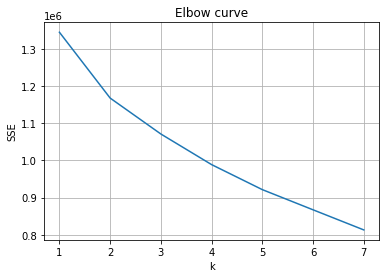

In [18]:
k = (range(1,8))
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.plot(k, SSE)
plt.show()

In [55]:
model = KMeans(n_clusters=3, random_state=99) #There is a parameter n_init that defines the maximum number of iterations. Hence, there will be a total of 30 centroids
model.fit(df6)

KMeans(n_clusters=3, random_state=99)

In [56]:
model.labels_
df1['clusters'] = model.labels_ 
df1['clusters'].value_counts()

C:\Users\yuhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    94
2    75
0    40
Name: clusters, dtype: int64

In [57]:
clust_means = pd.DataFrame(model.cluster_centers_, columns=df1.columns[0:len(df1.columns)-1])
print(round(clust_means))

   resale_price  Dist from Nearest Expressway  \
0          -1.0                           1.0   
1           0.0                          -0.0   
2           0.0                          -1.0   

   Dist from Nearest Hawker Centre  Dist from Nearest Public Hospital  \
0                              1.0                                1.0   
1                             -1.0                               -0.0   
2                              0.0                               -1.0   

   Dist from Nearest MRT  Dist from Nearest Park  Dist from Polyclinic  \
0                    0.0                    -1.0                   1.0   
1                    1.0                    -0.0                   0.0   
2                   -1.0                     1.0                  -1.0   

   Dist from Primary School  Dist from Shopping Mall  \
0                      -1.0                      1.0   
1                       1.0                      0.0   
2                      -0.0                  

<AxesSubplot:>

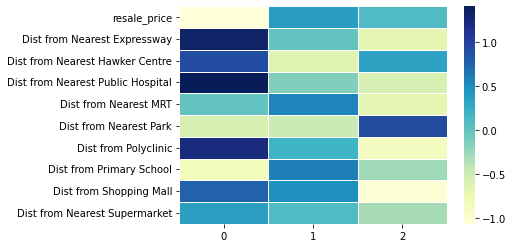

In [58]:
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

In [59]:
df1[df1["clusters"] == 1].mean()

resale_price                         471129.446809
Dist from Nearest Expressway              3.213748
Dist from Nearest Hawker Centre           0.604935
Dist from Nearest Public Hospital         0.952243
Dist from Nearest MRT                     1.211657
Dist from Nearest Park                    0.500170
Dist from Polyclinic                      1.200960
Dist from Primary School                  0.494363
Dist from Shopping Mall                   0.849420
Dist from Nearest Supermarket             0.290200
clusters                                  1.000000
dtype: float64

In [60]:
df1[df1["clusters"] == 0].mean()

resale_price                         375225.000000
Dist from Nearest Expressway              4.228619
Dist from Nearest Hawker Centre           1.150471
Dist from Nearest Public Hospital         1.465878
Dist from Nearest MRT                     0.998716
Dist from Nearest Park                    0.474687
Dist from Polyclinic                      1.596452
Dist from Primary School                  0.248813
Dist from Shopping Mall                   0.935125
Dist from Nearest Supermarket             0.322073
clusters                                  0.000000
dtype: float64

In [61]:
df1[df1["clusters"] == 2].mean()

resale_price                         452140.693333
Dist from Nearest Expressway              2.684258
Dist from Nearest Hawker Centre           0.952724
Dist from Nearest Public Hospital         0.809755
Dist from Nearest MRT                     0.729118
Dist from Nearest Park                    0.845304
Dist from Polyclinic                      0.790693
Dist from Primary School                  0.345173
Dist from Shopping Mall                   0.392292
Dist from Nearest Supermarket             0.240925
clusters                                  2.000000
dtype: float64